In [115]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import ast
import re
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import xgboost as xgb
from xgboost import plot_tree
from dtreeviz.trees import *
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn.tree import export_graphviz

# Database upload

In [116]:
df = pd.read_csv('shampoo_final.csv')
df

,rating,title_x,text,asin,parent_asin,user_id,timestamp,main_category,title_y,average_rating,rating_number,details,brand,hair_type,item_form,package_dimensions,top_hair_type,size_classification,unified_hair_type
0,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry
1,3,Not for red heads,I probably would have liked this product more ...,B081TJ8YS3,B081TJ8YS3,AE2QIXAAA7BP3ZNXM5ZQQBZJAIYA,2020-03-04 00:34:51.369,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry
2,5,Nice product,This company is highly ethical; I had a proble...,B081TJ8YS3,B081TJ8YS3,AENV2AUUV7VSMBEWWP7RIV7YXYFA,2020-05-13 15:47:24.180,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry
3,1,Not a fan,I really wanted to like this but sadly not a f...,B081TJ8YS3,B081TJ8YS3,AGYJKMQRFN6VF5F72IPOOYIEC6BA,2020-10-22 18:42:28.059,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry
4,5,The dry shampoo I’ve been searching for my who...,This stuff is divine. I have oily roots and ev...,B081TJ8YS3,B081TJ8YS3,AEQCG3FBJLSF5YDD436QDTPPLE3Q,2020-02-22 19:36:00.164,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16863,5,My go to shampoo and conditioner,Gentle on my color treated hair. I’ve been usi...,B09DPG8NJX,B09DPG8NJX,AFBIONGGRLBLCDYXDJHFMECA6ZQQ,2023-06-04 06:36:23.752,Premium Beauty,Pure Blends Coco-Colada Shampoo & Conditioner ...,5.0,1,"{'Item Form': 'Liquid', 'Brand': 'Pure Blends'...",Pure Blends,Dry,Liquid,11 x 9 x 0.5 inches,dry,L,dry
16864,1,Trash,waste of money. one big lie. after using it ...,B00N5OZNPA,B00N5OZNPA,AFSN4U37N753DJ5QAAHSBEC7DEUA,2022-02-04 03:43:16.113,All Beauty,Shampoo Dx2 UK - Dla Mężczyzn - Szampon Przeci...,3.3,10,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",TRESemmé,Dry,Liquid,12 x 4 x 4 inches,dry,L,dry
16865,5,Glad it's not plastic because I can flip it up...,I used it on my toddler she loves washing her ...,B01IOJTU8G,B01IOJTU8G,AFTIDQZSMPGFCR33AGELYHL72XLA,2017-05-17 03:15:56.000,All Beauty,"Baby ShowerCap, Bigban Baby Shampoo Shower Bat...",4.1,4,{},TRESemmé,Dry,Liquid,11 x 9 x 0.5 inches,dry,L,dry
16866,5,I love it,I love this shampoo I could go for almost a wh...,B08LN2QK76,B08LN2QK76,AH4FIVZN3MLE7GYBKCASZH7EPEIQ,2022-03-24 20:46:09.704,All Beauty,Permanent Hair Color Shampoo Natural Coconut O...,4.5,30,"{'Brand': 'dongjing', 'Item Form': 'Oil', 'Hai...",dongjing,Dry,Oil,9.69 x 4.49 x 2.6 inches; 1.19 Pounds,dry,M,dry


# Tratamento de Dados

In [117]:
df_less_than_4 =    df[df['rating'] <= 4]
df_greater_than_4 = df[df['rating'] > 4 ]

In [118]:
df['rating'].value_counts()

5    10764
1     2048
4     1839
3     1254
2      963
Name: rating, dtype: int64

In [119]:
# Define rating_cat as customer satisfaction (1 for yes, 0 for no)
def converter_categoria(valor):
    if valor <= 4:
        return '0'
    else:
        return '1'

# Aplicar a função à coluna alvo
df['rating_cat'] = df['rating'].apply(converter_categoria)

In [120]:
df.drop(columns=['rating_number'], inplace=True)

In [121]:
df

,rating,title_x,text,asin,parent_asin,user_id,timestamp,main_category,title_y,average_rating,details,brand,hair_type,item_form,package_dimensions,top_hair_type,size_classification,unified_hair_type,rating_cat
0,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
1,3,Not for red heads,I probably would have liked this product more ...,B081TJ8YS3,B081TJ8YS3,AE2QIXAAA7BP3ZNXM5ZQQBZJAIYA,2020-03-04 00:34:51.369,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
2,5,Nice product,This company is highly ethical; I had a proble...,B081TJ8YS3,B081TJ8YS3,AENV2AUUV7VSMBEWWP7RIV7YXYFA,2020-05-13 15:47:24.180,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,1
3,1,Not a fan,I really wanted to like this but sadly not a f...,B081TJ8YS3,B081TJ8YS3,AGYJKMQRFN6VF5F72IPOOYIEC6BA,2020-10-22 18:42:28.059,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
4,5,The dry shampoo I’ve been searching for my who...,This stuff is divine. I have oily roots and ev...,B081TJ8YS3,B081TJ8YS3,AEQCG3FBJLSF5YDD436QDTPPLE3Q,2020-02-22 19:36:00.164,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16863,5,My go to shampoo and conditioner,Gentle on my color treated hair. I’ve been usi...,B09DPG8NJX,B09DPG8NJX,AFBIONGGRLBLCDYXDJHFMECA6ZQQ,2023-06-04 06:36:23.752,Premium Beauty,Pure Blends Coco-Colada Shampoo & Conditioner ...,5.0,"{'Item Form': 'Liquid', 'Brand': 'Pure Blends'...",Pure Blends,Dry,Liquid,11 x 9 x 0.5 inches,dry,L,dry,1
16864,1,Trash,waste of money. one big lie. after using it ...,B00N5OZNPA,B00N5OZNPA,AFSN4U37N753DJ5QAAHSBEC7DEUA,2022-02-04 03:43:16.113,All Beauty,Shampoo Dx2 UK - Dla Mężczyzn - Szampon Przeci...,3.3,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",TRESemmé,Dry,Liquid,12 x 4 x 4 inches,dry,L,dry,0
16865,5,Glad it's not plastic because I can flip it up...,I used it on my toddler she loves washing her ...,B01IOJTU8G,B01IOJTU8G,AFTIDQZSMPGFCR33AGELYHL72XLA,2017-05-17 03:15:56.000,All Beauty,"Baby ShowerCap, Bigban Baby Shampoo Shower Bat...",4.1,{},TRESemmé,Dry,Liquid,11 x 9 x 0.5 inches,dry,L,dry,1
16866,5,I love it,I love this shampoo I could go for almost a wh...,B08LN2QK76,B08LN2QK76,AH4FIVZN3MLE7GYBKCASZH7EPEIQ,2022-03-24 20:46:09.704,All Beauty,Permanent Hair Color Shampoo Natural Coconut O...,4.5,"{'Brand': 'dongjing', 'Item Form': 'Oil', 'Hai...",dongjing,Dry,Oil,9.69 x 4.49 x 2.6 inches; 1.19 Pounds,dry,M,dry,1


In [139]:
import pandas as pd


# Atualizar o dicionário de mapeamento conforme as novas categorias e substituições
item_form_mapping = {
    'Powder': ['Powder', 'powder'],
    'Liquid': ['Liquid', 'Lotion,Liquid,Gel', 'Liquid,Bar', 'Liquid,Creamy', 'Liquid,Foam', 'liquid', 'Liquid,Powder', 'Oil'],
    'Cream': ['Cream', 'Cream,Liquid', 'Cream,butter', 'Serum'],
    'Gel': ['Gel', 'Lotion,Liquid,Gel'],
    'Bar': ['Bar', 'Bars', 'Bar,Foam', 'Stick'],
    'Shampoo': ['Shampoo'],
    'Other': ['cape', 'Wand', 'Spray', 'Foam', 'Balm', 'Stick', 'wash', 'Instant', 'Wipe', 'Wipes', 'Ground', 'Oil, Wax', 'Aerosol', 'Individual, Pair', 'Pac', 'Roll On', 'Mask', 'foam', 'Pac']
}

# Função para mapear os valores para as novas categorias
def map_item_form(value):
    for category, keywords in item_form_mapping.items():
        if value in keywords:
            return category
    return 'Other'  # Categoria padrão para valores que não foram mapeados

# Aplicar a função à coluna 'item_form'
df['item_form'] = df['item_form'].apply(map_item_form)

# Exibir as primeiras linhas do DataFrame atualizado
df.head()


,rating,title_x,text,asin,parent_asin,user_id,timestamp,main_category,title_y,average_rating,details,brand,hair_type,item_form,package_dimensions,top_hair_type,size_classification,unified_hair_type,rating_cat
0,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
1,3,Not for red heads,I probably would have liked this product more ...,B081TJ8YS3,B081TJ8YS3,AE2QIXAAA7BP3ZNXM5ZQQBZJAIYA,2020-03-04 00:34:51.369,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
2,5,Nice product,This company is highly ethical; I had a proble...,B081TJ8YS3,B081TJ8YS3,AENV2AUUV7VSMBEWWP7RIV7YXYFA,2020-05-13 15:47:24.180,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,1
3,1,Not a fan,I really wanted to like this but sadly not a f...,B081TJ8YS3,B081TJ8YS3,AGYJKMQRFN6VF5F72IPOOYIEC6BA,2020-10-22 18:42:28.059,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
4,5,The dry shampoo I’ve been searching for my who...,This stuff is divine. I have oily roots and ev...,B081TJ8YS3,B081TJ8YS3,AEQCG3FBJLSF5YDD436QDTPPLE3Q,2020-02-22 19:36:00.164,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,1


In [123]:
brand_counts = df['brand'].value_counts()

# Definir um limite para o número de marcas a serem mantidas
threshold = 10

# Identificar as marcas menos frequentes
less_frequent_brands = brand_counts[brand_counts < threshold].index

# Substituir marcas menos frequentes por 'Other'
df['brand'] = df['brand'].apply(lambda x: 'Other' if x in less_frequent_brands else x)

In [124]:
brand_counts = df['brand'].value_counts()
brand_counts.head(100)

TRESemmé              3477
Other                 2035
Pure Body Naturals     861
Premium Nature         712
BELLISSO               665
                      ... 
Hair Food               29
MACRAY                  28
GLISS                   28
Generic                 28
TAYA I AM.              27
Name: brand, Length: 100, dtype: int64

In [125]:
# Remover as linhas onde a marca é 'Other'
df_cleaned = df[df['brand'] != 'Other']

# Verificar se as linhas foram removidas corretamente
df_cleaned['brand'].value_counts()


TRESemmé              3477
Pure Body Naturals     861
Premium Nature         712
BELLISSO               665
VERB                   405
                      ... 
Airfly                  10
Tate's                  10
Handmade Heroes         10
Biogreen Labs           10
GoodOnYa                10
Name: brand, Length: 223, dtype: int64

In [126]:
df_cleaned

,rating,title_x,text,asin,parent_asin,user_id,timestamp,main_category,title_y,average_rating,details,brand,hair_type,item_form,package_dimensions,top_hair_type,size_classification,unified_hair_type,rating_cat
0,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
1,3,Not for red heads,I probably would have liked this product more ...,B081TJ8YS3,B081TJ8YS3,AE2QIXAAA7BP3ZNXM5ZQQBZJAIYA,2020-03-04 00:34:51.369,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
2,5,Nice product,This company is highly ethical; I had a proble...,B081TJ8YS3,B081TJ8YS3,AENV2AUUV7VSMBEWWP7RIV7YXYFA,2020-05-13 15:47:24.180,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,1
3,1,Not a fan,I really wanted to like this but sadly not a f...,B081TJ8YS3,B081TJ8YS3,AGYJKMQRFN6VF5F72IPOOYIEC6BA,2020-10-22 18:42:28.059,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,0
4,5,The dry shampoo I’ve been searching for my who...,This stuff is divine. I have oily roots and ev...,B081TJ8YS3,B081TJ8YS3,AEQCG3FBJLSF5YDD436QDTPPLE3Q,2020-02-22 19:36:00.164,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Two Goats Apothecary,Dry,Powder,6.6 x 4.2 x 1.5 inches; 5.61 Ounces,dry,S,dry,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16860,5,Great lather!,"Great lather, smells amazing. Makes my hair sq...",B0CBWDTY41,B0CBWDTY41,AFG5BM6RUWX5JFPBQ33UGFOHEOGQ,2023-08-15 01:37:12.585,All Beauty,REVIPP Pillow Soft Curl Clarifying Shampoo Cur...,4.7,"{'Item Weight': '8 Ounces', 'UPC': '8500383280...",TRESemmé,Dry,Liquid,11 x 9 x 0.5 inches,dry,L,dry,1
16861,5,Works Great,I paired this with their conditioner and it wo...,B0CBWDTY41,B0CBWDTY41,AE7XLYJ2DJGB3WNTPJ7Q47EXYY5Q,2023-08-29 01:12:00.196,All Beauty,REVIPP Pillow Soft Curl Clarifying Shampoo Cur...,4.7,"{'Item Weight': '8 Ounces', 'UPC': '8500383280...",TRESemmé,Dry,Liquid,11 x 9 x 0.5 inches,dry,L,dry,1
16864,1,Trash,waste of money. one big lie. after using it ...,B00N5OZNPA,B00N5OZNPA,AFSN4U37N753DJ5QAAHSBEC7DEUA,2022-02-04 03:43:16.113,All Beauty,Shampoo Dx2 UK - Dla Mężczyzn - Szampon Przeci...,3.3,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",TRESemmé,Dry,Liquid,12 x 4 x 4 inches,dry,L,dry,0
16865,5,Glad it's not plastic because I can flip it up...,I used it on my toddler she loves washing her ...,B01IOJTU8G,B01IOJTU8G,AFTIDQZSMPGFCR33AGELYHL72XLA,2017-05-17 03:15:56.000,All Beauty,"Baby ShowerCap, Bigban Baby Shampoo Shower Bat...",4.1,{},TRESemmé,Dry,Liquid,11 x 9 x 0.5 inches,dry,L,dry,1


# Encoding

In [127]:
features = ['unified_hair_type', 'size_classification', 'item_form', 'brand']
target = 'rating_cat'


In [128]:
X = df_cleaned[features]
y = df_cleaned[target]


In [129]:
X_encoded = pd.get_dummies(X, columns=features)

# Treinar modelo

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [131]:
model = DecisionTreeClassifier(random_state=42)
#model.fit(X_train, y_train)

In [132]:
param_distributions = {
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Configurar o Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, 
                                   random_state=42)

# Ajustar o Randomized Search aos dados
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_params = random_search.best_params_

print(f"Melhores Parâmetros: {best_params}")

Melhores Parâmetros: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6}


### Testar com os melhores parâmetros

In [133]:
best_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6, random_state=42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


In [134]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Melhor Modelo: {accuracy:.2f}")

Acurácia do Melhor Modelo: 0.64


In [135]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.65      0.09      0.16      1106
           1       0.64      0.97      0.77      1861

    accuracy                           0.64      2967
   macro avg       0.65      0.53      0.47      2967
weighted avg       0.65      0.64      0.55      2967



# Matriz de Confusão

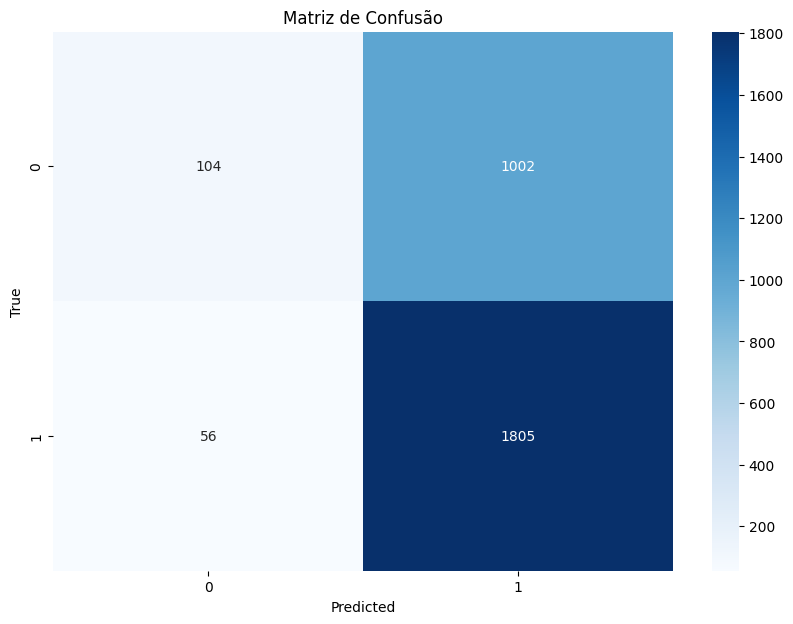

In [136]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

# Importância das Features

In [137]:
feature_names = X_train.columns

# Verificar o comprimento das importâncias e dos nomes das características
print(f"Number of feature names: {len(feature_names)}")
print(f"Number of importances: {len(importances)}")

# Criar o DataFrame de importâncias com os nomes das características corretos
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibir as importâncias
importance_df

Number of feature names: 235
Number of importances: 235


,Feature,Importance
33,brand_BELLISSO,0.459416
132,brand_Mifelio,0.183221
51,brand_Chialstar,0.073874
74,brand_GK HAIR,0.061945
158,brand_Paradise Island,0.056471
...,...,...
86,brand_HONEYDEW,0.000000
87,brand_Hair Food,0.000000
88,brand_Handmade Heroes,0.000000
89,brand_Hanz de Fuko,0.000000


              Category  Importance
0                brand    0.982447
1            item_form    0.014224
3    unified_hair_type    0.002894
2  size_classification    0.000435


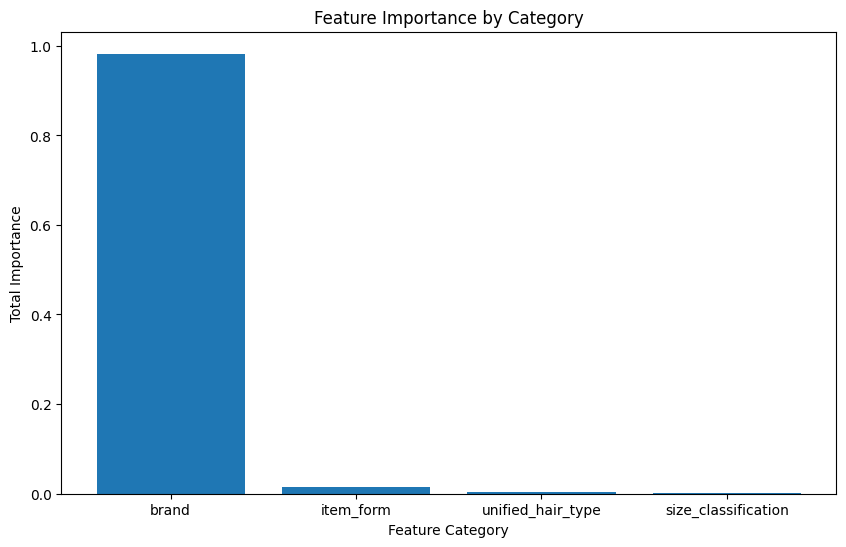

In [140]:
import pandas as pd

# Supondo que você já tenha o DataFrame `importance_df`
# Criar uma coluna para categorizar as features de volta às suas categorias originais
def get_feature_category(feature):
    if feature.startswith('unified_hair_type'):
        return 'unified_hair_type'
    elif feature.startswith('size_classification'):
        return 'size_classification'
    elif feature.startswith('item_form'):
        return 'item_form'
    elif feature.startswith('brand'):
        return 'brand'
    else:
        return 'unknown'

# Aplicar a função para criar a coluna 'Category'
importance_df['Category'] = importance_df['Feature'].apply(get_feature_category)

# Agrupar por categoria e somar as importâncias
category_importance_df = importance_df.groupby('Category')['Importance'].sum().reset_index()

# Ordenar por importância
category_importance_df = category_importance_df.sort_values(by='Importance', ascending=False)

print(category_importance_df)

# Plotar as importâncias
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(category_importance_df['Category'], category_importance_df['Importance'])
plt.xlabel('Feature Category')
plt.ylabel('Total Importance')
plt.title('Feature Importance by Category')
plt.show()


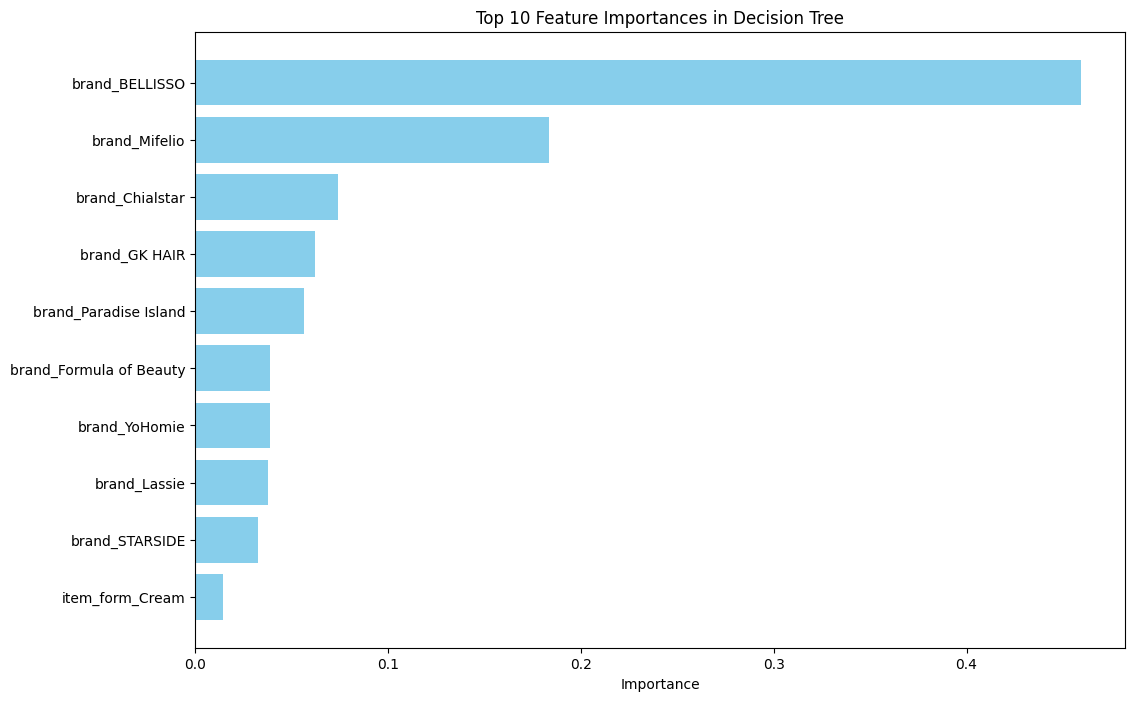

In [138]:
import matplotlib.pyplot as plt

# Obter os 10 principais recursos com base na importância
top_10_importances = importance_df.head(10)

# Plotar os 10 principais recursos
plt.figure(figsize=(12, 8))
plt.barh(top_10_importances['Feature'], top_10_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances in Decision Tree')
plt.gca().invert_yaxis()
plt.show()
